In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import numpy as np

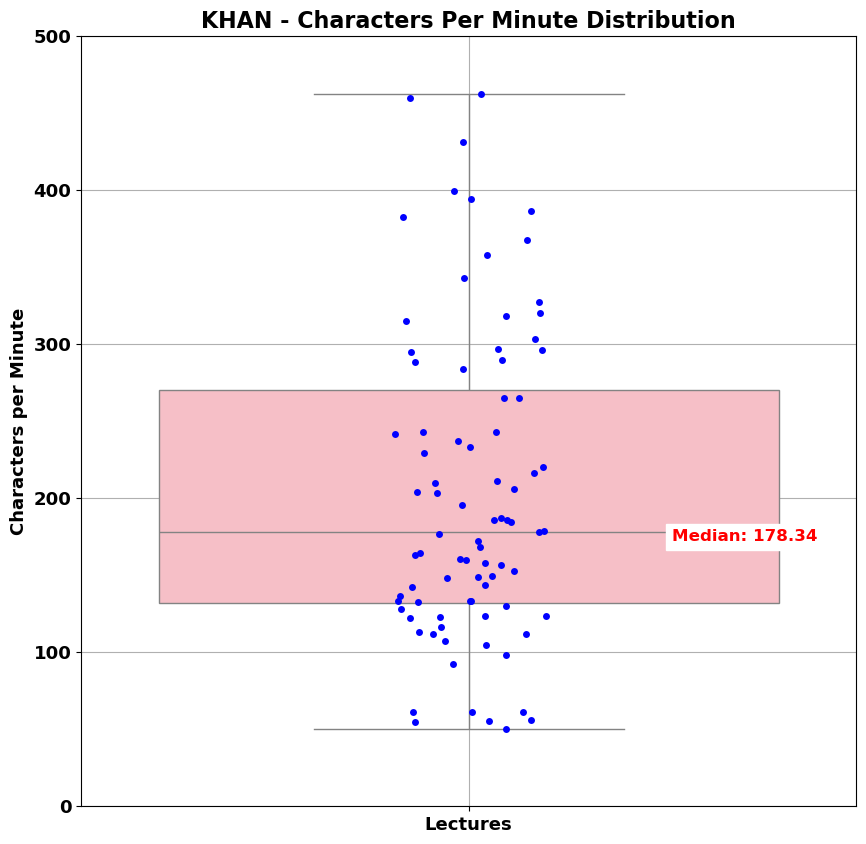

In [2]:
# 오디오 파일과 텍스트 파일 경로 설정
audio_folder = 'khan_audio'
text_folder = 'khan_audio_txt_with_timestamp'

# 함수: 오디오 길이(초)를 가져오는 함수
def get_audio_duration(file_path):
    y, sr = librosa.load(file_path)
    return librosa.get_duration(y=y, sr=sr)

# 함수: 텍스트 파일에서 전체 문자 수를 계산하는 함수
def count_total_characters(file_path):
    total_chars = 0
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            total_chars += len(line.strip())
    return total_chars

# 함수: 전체 문자 수와 영상 길이를 비교하여 비율을 계산
def calculate_text_ratio(text_chars, audio_duration_sec):
    total_duration_min = audio_duration_sec / 60
    ratio = text_chars / total_duration_min if total_duration_min > 0 else 0
    return ratio

# 파일 처리 및 시각화
def visualize_text_ratio():
    audio_files = sorted([f for f in os.listdir(audio_folder) if f.endswith('.mp3')])
    text_files = sorted([f for f in os.listdir(text_folder) if f.endswith('.txt')])
    
    if len(audio_files) != len(text_files):
        raise ValueError("오디오 파일과 텍스트 파일의 수가 일치하지 않습니다.")
    
    text_ratios = []

    for audio_file, text_file in zip(audio_files, text_files):
        audio_path = os.path.join(audio_folder, audio_file)
        text_path = os.path.join(text_folder, text_file)
        
        duration_sec = get_audio_duration(audio_path)
        total_chars = count_total_characters(text_path)
        ratio = calculate_text_ratio(total_chars, duration_sec)
        
        text_ratios.append(ratio)

    # 박스플롯 및 스트립플롯 생성
    plt.figure(figsize=(10, 10))
    ax = sns.boxplot(data=text_ratios, orient='v', color='lightpink')  # 세로 방향 박스플롯
    sns.stripplot(data=text_ratios, orient='v', color='blue', jitter=True)  # 세로 방향 스트립플롯

    # 중앙값 표시
    median = np.median(text_ratios)
    plt.text(0.95, 0.35, f'Median: {median:.2f}', color='red', ha='right', va='center', 
             fontweight='bold', fontsize=12, transform=ax.transAxes, backgroundcolor='white')

    plt.title('KHAN - Characters Per Minute Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('')  # x축에 'Lecture' 레이블 추가
    plt.ylabel('Characters per Minute', fontsize=13, fontweight='bold')  # y축에 'Characters/Minute' 레이블 추가

    plt.xticks([0], ['Lectures'], fontsize=13, fontweight='bold')  # 단일 데이터 세트이므로 x축에 하나의 레이블만 추가
    # y축 스케일을 특정 값으로 설정
    plt.yticks([0, 100, 200, 300, 400, 500], fontweight='bold', fontsize=13)

    plt.grid(True)
    plt.show()

# 예시 실행 (모든 데이터를 하나의 그래프로 시각화)
visualize_text_ratio()
